In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Exercise 1

In [2]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [3]:
print(df.info())  # Information about the dataset
print(df['diabetes'].value_counts())  # Count positive and negative cases

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
diabetes
0    91500
1     8500
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le_gender = LabelEncoder()
le_smoking = LabelEncoder()

# Encode the 'gender' and 'smoking_history' columns
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['smoking_history_encoded'] = le_smoking.fit_transform(df['smoking_history'])

In [5]:
# Drop original columns if necessary
df_cleaned = df.drop(['gender', 'smoking_history'], axis=1)

print(df_cleaned.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_encoded  smoking_history_encoded  
0         0               0                        4  
1         0               0                        0  
2         0               1                        4  
3         0               0                        1  
4         0               1                        1  


In [6]:
# Splitting the data into features (X) and target (y)
X = df_cleaned.drop('diabetes', axis=1)  # Features
y = df_cleaned['diabetes']  # Target (0 or 1)

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 80000, Testing samples: 20000


### Exercise 2

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()

# Apply standardization to the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression is suitable because it's a binary classification problem (predicting diabetes = 1 or 0).

Standardization is required for logistic regression as it helps the model converge faster and perform better when the data is scaled.

We use StandardScaler to scale both the training and testing datasets.

### Exercise 3

In [10]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Check the training accuracy
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.960675
Testing Accuracy: 0.9587


High Accuracy:

Both training and testing accuracies are high, indicating that the model performs well on both the training data and unseen testing data.

Low Difference between Training and Testing Accuracy:

The difference between training accuracy (96.07%) and testing accuracy (95.87%) is very small (only about 0.2%).

This suggests:

Low overfitting: The model generalizes well, meaning it’s not just memorizing the training data but is also able to make good predictions on new data.

Balanced Model: The model is well-tuned and has found a good balance between underfitting and overfitting.

### Exercise 4

Accuracy: 0.9587


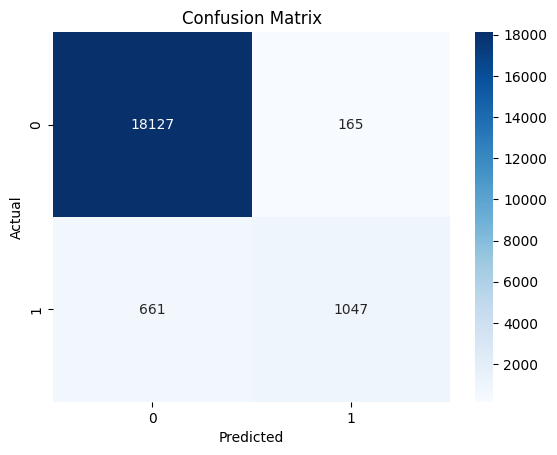

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (includes Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

Class Imbalance:

The dataset is imbalanced (18,292 non-diabetic vs. 1,708 diabetic cases). The model is performing very well for class 0, but struggling with class 1.
The recall for class 1 is only 0.61, meaning the model is missing a significant number of actual diabetic cases.

Precision vs. Recall for Class 1:

The precision of 0.86 for class 1 is decent, meaning when the model predicts diabetes, it is usually correct. However, the low recall (0.61) suggests the model is conservative and might not identify all diabetic cases.
If the cost of missing diabetic cases is high, recall needs to be improved.

F1-Score:

For class 1, the F1-score is 0.72, which indicates the model struggles with balancing precision and recall for diabetic cases. This could be improved by using techniques to handle class imbalance (e.g., SMOTE, undersampling, or adjusting class weights).

### Exercise 5

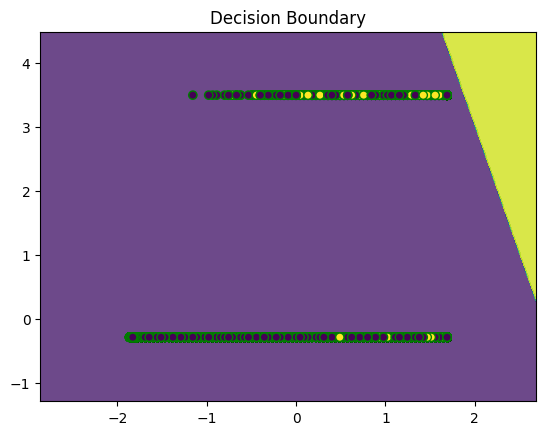

In [12]:
import numpy as np

# Plot decision boundary (for 2 features)
def plot_decision_boundary(X, y, model):
    # Mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
    plt.title('Decision Boundary')
    plt.show()

# Select only 2 features (for visualization)
X_train_subset = X_train_scaled[:, :2]
X_test_subset = X_test_scaled[:, :2]

# Retrain the model with 2 features for visualization
model_2d = LogisticRegression()
model_2d.fit(X_train_subset, y_train)

# Plot decision boundary
plot_decision_boundary(X_test_subset, y_test, model_2d)

### Exercise 6

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [14]:
# Predict probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # We only need probabilities for the positive class (1)

In [15]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC (Area Under Curve)
roc_auc = roc_auc_score(y_test, y_proba)

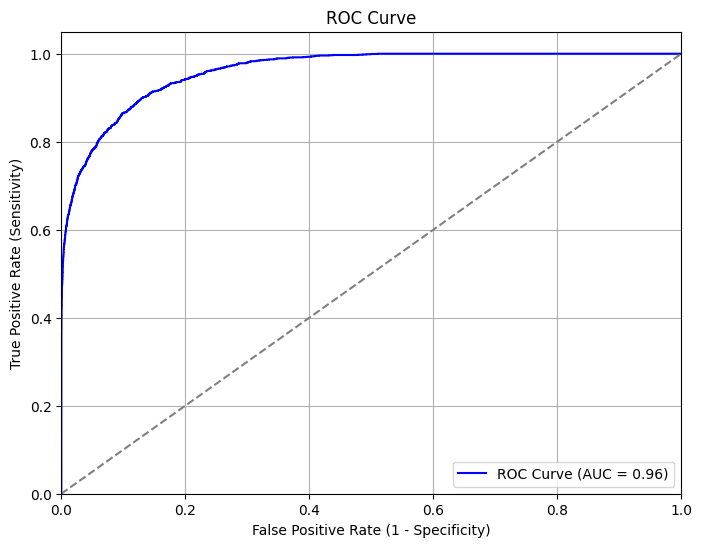

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The ROC curve suggests that the model is excellent at predicting diabetes based on the given features, with a low rate of false positives and a high true positive rate. The AUC of 0.96 supports this conclusion, indicating that the model has excellent discriminatory power. However, you might still want to check if the model handles the class imbalance effectively, as seen in the precision-recall performance from the confusion matrix results shared earlier.